# Modelos de Classificação

In [24]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Importando e avaliando dataset

In [5]:
df = pl.read_excel('data/gaf_esp.xlsx')
df.sample(5)

Espécie,Comprimento do Abdômen,Comprimento das Antenas
str,f64,f64
"""Esperança""",7.7,7.9
"""Gafanhoto""",2.8,3.0
"""Gafanhoto""",2.0,4.0
"""Gafanhoto""",1.5,6.0
"""Esperança""",9.75,6.2


Vamos ver as estatísticas básicas dos dados e fazer uma análise exploratória.

In [7]:
df.shape

(100, 3)

In [6]:
df.describe()

describe,Espécie,Comprimento do Abdômen,Comprimento das Antenas
str,str,f64,f64
"""count""","""100""",100.0,100.0
"""null_count""","""0""",0.0,0.0
"""mean""",null,4.9362,5.3824
"""std""",null,3.343806,2.296001
"""min""","""Esperança""",0.5,0.89
"""25%""",null,1.7,3.78
"""50%""",null,5.4,5.5
"""75%""",null,8.2,7.0
"""max""","""Gafanhoto""",10.0,9.7


In [10]:
df.to_pandas().groupby('Espécie').describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

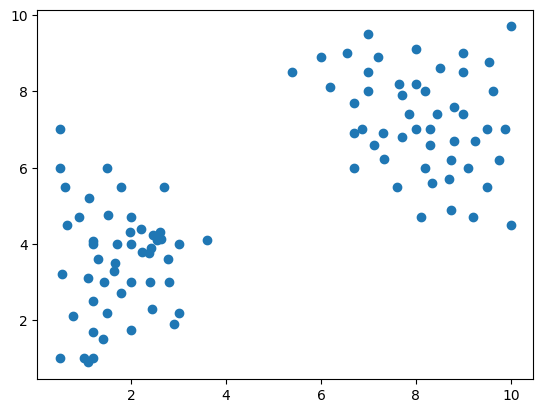

<Axes: xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

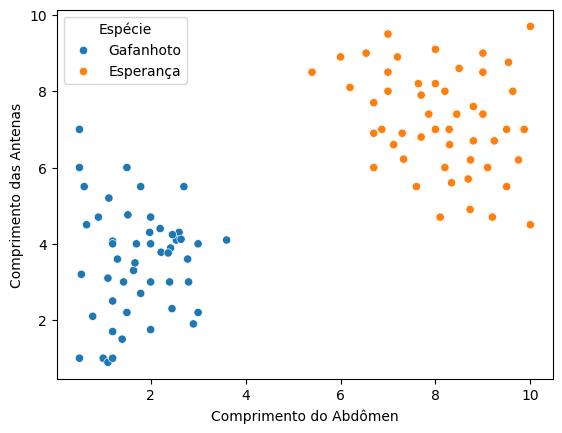

In [16]:
sns.scatterplot(data=df, x='Comprimento do Abdômen', y='Comprimento das Antenas', hue='Espécie')

## Treinando Modelos de classificação

In [26]:
X = df.select(pl.all().exclude('Espécie'))
y = df.select(pl.col('Espécie'))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [27]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train.to_numpy().ravel())

KNeighborsClassifier(n_neighbors=3)

In [31]:
print(f'Exemplo de Classificação - Comp. Abdômen: 5.1, Comp. Antenas: 1.8: {kn.predict([[5.1, 1.8]])}')

Exemplo de Classificação - Comp. Abdômen: 5.1, Comp. Antenas: 1.8: ['Gafanhoto']


/Users/zfab/repos/postech/f2-machine-learning/.venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [28]:
y_pred = kn.predict(X_test)

In [29]:
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acc}')

Acurácia: 1.0
